In [11]:
# whole standard Data Science library
import pandas as pd
import numpy as np


# setting random seed to 7
np.random.seed(7)

#vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# selected functions from Data Science libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


#import project modules
import src.german_credit_acquire as gca


import os


# libraries for convenience
pd.options.display.float_format = '{:,.3f}'.format

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

# module for fixing imported modules
from importlib import reload

In [12]:
train, validate, test = gca.get_german_credit()

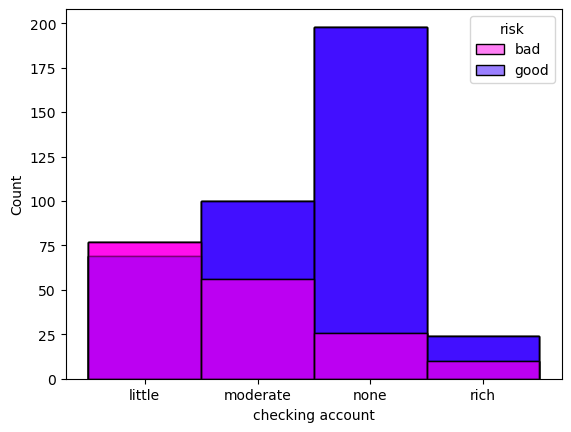

In [50]:
for i in checking:
     sns.histplot(data = train, x = 'checking account', hue = 'risk')

In [19]:
def age_credit_distribution(df):
    plt.figure(figsize=(20,20))
    big_variables= ['age', 'credit amount']
    small_variables= ['sex', 'job', 'housing', 'saving accounts', 'checking account']

    n =310
    for i in big_variables:
        n+=1 
        plt.subplot(n)
        sns.histplot(data = df, x=i, hue='risk', kde = True, bins= 50, palette='hsv')
    
    plt.show()
    
def small_viz(df):
    plt.figure(figsize=(20,20))
    small_variables= ['sex', 'job', 'housing', 'saving accounts', 'checking account', 'duration']
    
    n =320
    for i in small_variables:
        n+=1 
        plt.subplot(n)
        sns.histplot(data = df, x=i, hue='risk', kde= True, bins = 10, palette='hsv')    
    


In [33]:
def age_distribution(df):
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x='age',hue='risk', kde=True, bins=25, palette='hsv_r')

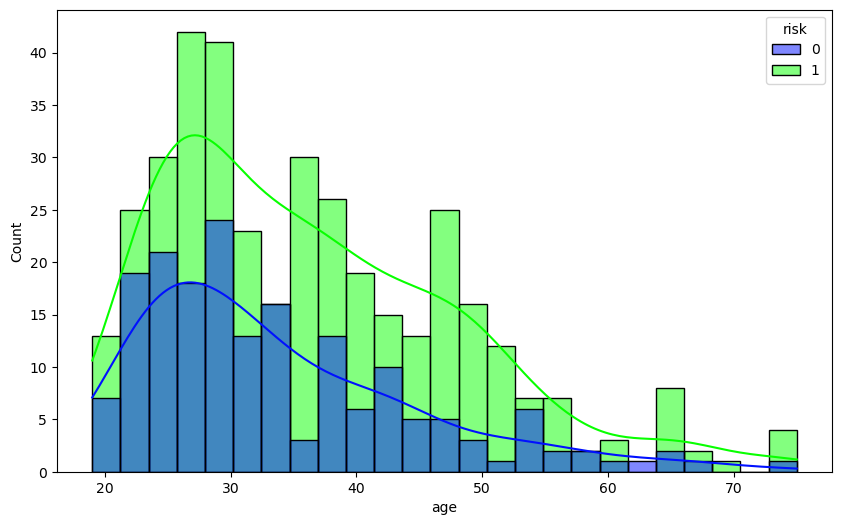

In [34]:
age_distribution(train)

### We see that there is not an even distribution between ages and the effective credit risk the bank sees from applicants.

### I will break these ages into categories for further analysis

#### The minimum and maximum of the age category 
#### Then the quantile proportions of the applicants in the sample: the 25%, 50%, and 80th% quantiles

In [40]:
print((train['age'].min(), train['age'].max()))
print((train['age'].quantile(.25), train['age'].quantile(.5),round(train['age'].quantile(.8),0)))

(19, 75)
(26.0, 33.0, 45.0)


In [25]:
#creating bins for ages

age_groups = (19,26,33,45,75)
age_categories = ['early_life','early_established','established','older']

train['age_groups'] = pd.cut(train['age'],age_groups, labels=age_categories)

In [ ]:
'''
plt.figure(figsize=(20, 6))
for i, county in enumerate(counties):
    plt.subplot(1, 3, i+1)
    plt.title('Logerror by bathrooms in ' + county)
    sns.swarmplot(x=sample[sample.county_name == county].bath, y=target)
    plt.ylabel('Absolute value of the logerror')
    plt.ylim(0, 0.55)
plt.show()
'''
plt.figure(figsize = (20, 6))
categories = ['
for

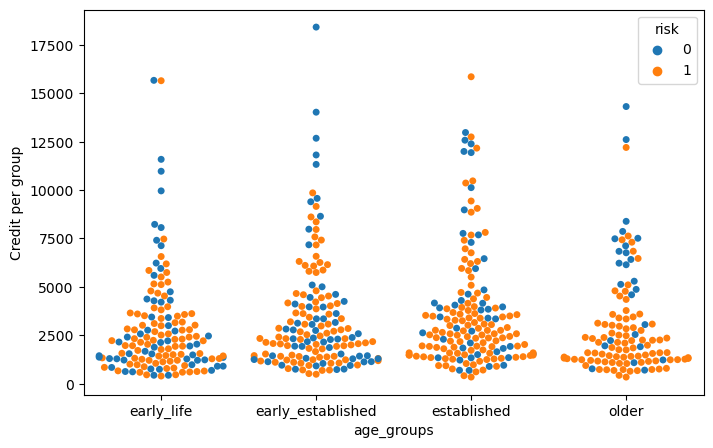

In [28]:
'''
plt.figure(figsize=(8, 4))
plt.title('Beds / bath ratio ')
ax = sns.swarmplot(x=sample.bed_bath_ratio, y=target)
plt.ylabel('Absolute value of the logerror')
plt.ylim(0, 0.55)
ax.set(xticks=[0.33, 5, 9, 13, 18])
ax.set(xticklabels=[0.33, 1.25, 2.5, 3.75, 5.00])
plt.show()
'''
plt.figure(figsize=(8,5))
ax = sns.swarmplot(x=train['age_groups'], y = train['credit amount'], hue = train['risk'])
plt.ylabel('Credit per group')
plt.show()

### We see that the age categories appear to consolidate more and more 'good credit' as the loan applicant gets more established

<AxesSubplot:xlabel='risk', ylabel='Count'>

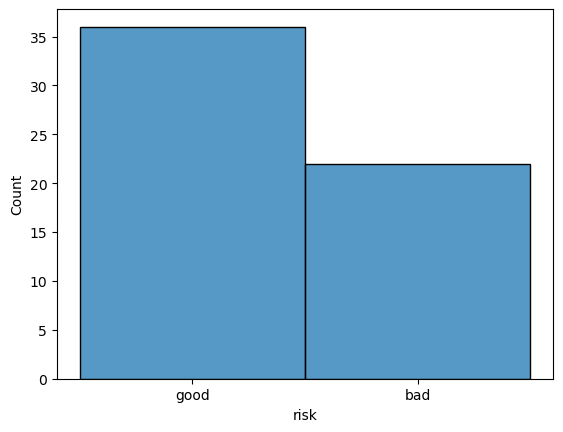

In [54]:
sns.histplot(data =train[train.housing == 'free'], x = 'risk')

In [7]:
train[train['checking account'] == 'nan']

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk


In [121]:
train['checking account'] = train['checking account'].replace({np.NAN:'none'})

In [77]:
nan_bool = train['checking account'] == 'nan'

In [92]:
test_df

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk
175,53,female,3,own,none,none,7485,30,car,0
781,60,male,2,own,rich,none,1940,24,car,1
827,36,male,2,own,little,none,4165,18,business,0
449,61,male,2,own,rich,moderate,1512,15,repairs,0
367,22,female,2,rent,little,little,3650,18,furniture/equipment,1
...,...,...,...,...,...,...,...,...,...,...
169,31,male,2,own,little,moderate,1935,24,business,0
445,41,female,1,rent,none,none,1244,9,education,1
817,24,female,2,rent,little,none,1554,6,radio/TV,1
231,51,male,1,free,quite rich,none,2507,9,car,1


In [119]:
train['checking account'].value_counts()

little      153
moderate    151
rich         36
Name: checking account, dtype: int64

In [86]:
little_bool = train['checking account'] == 'little'

In [6]:
train[train['checking account'] == 'little'].sum()

/var/folders/hf/46l4fb0x1bj47kh2tdxlqp1h0000gn/T/ipykernel_1444/2923263472.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[train['checking account'] == 'little'].sum()


age                5652
job                 294
credit amount    506593
duration           3307
dtype: int64

In [97]:
train[little_bool]

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk


In [82]:
df['checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

<AxesSubplot:xlabel='risk', ylabel='Count'>

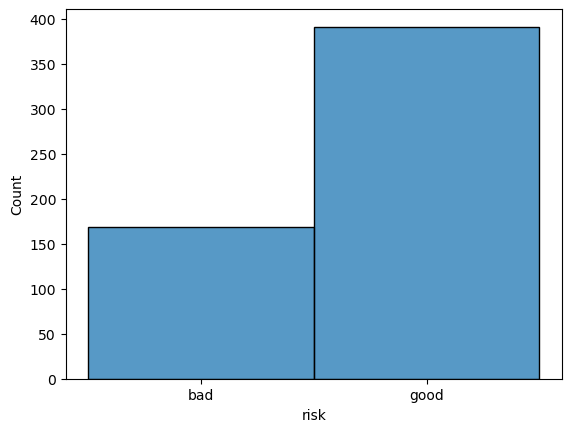

In [81]:
sns.histplot(data =train[train['checking account'] =='nan'], x = 'risk')

In [55]:
train[train == 'free'].count()

age                  0
sex                  0
job                  0
housing             58
saving accounts      0
checking account     0
credit amount        0
duration             0
purpose              0
risk                 0
dtype: int64

In [5]:
train.count()

age                 560
sex                 560
job                 560
housing             560
saving accounts     450
checking account    350
credit amount       560
duration            560
purpose             560
risk                560
dtype: int64

In [60]:
df['saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [65]:
checking_var = ['little', 'moderate', 'rich']

<AxesSubplot:xlabel='checking account', ylabel='Count'>

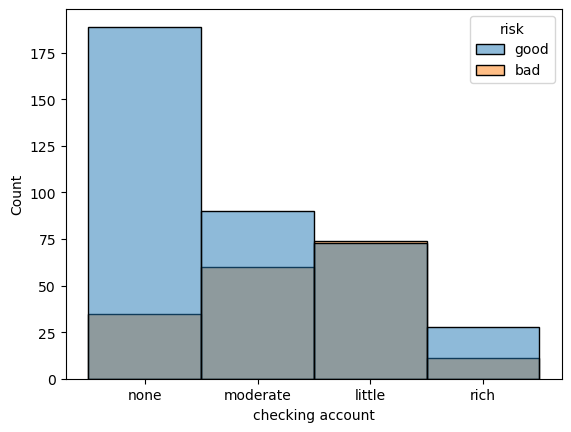

In [14]:
sns.histplot(data = train, x = 'checking account', hue = 'risk')

In [23]:
train.head()

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk
688,35,male,2,own,moderate,none,2753,9,radio/TV,good
654,35,male,2,own,little,none,2346,24,car,good
32,30,male,2,own,moderate,moderate,5866,18,car,good
815,54,female,2,rent,little,moderate,7432,36,car,good
772,36,male,3,own,little,none,3275,21,car,good


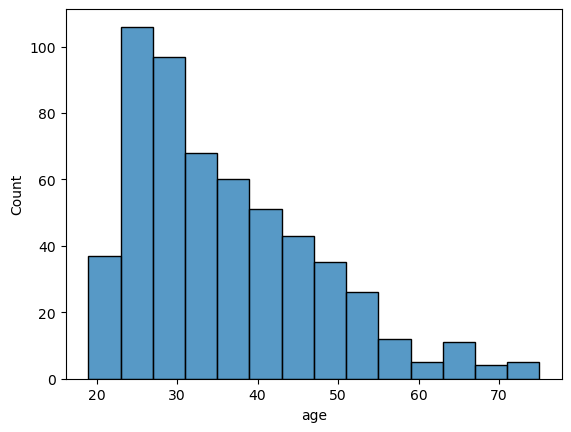

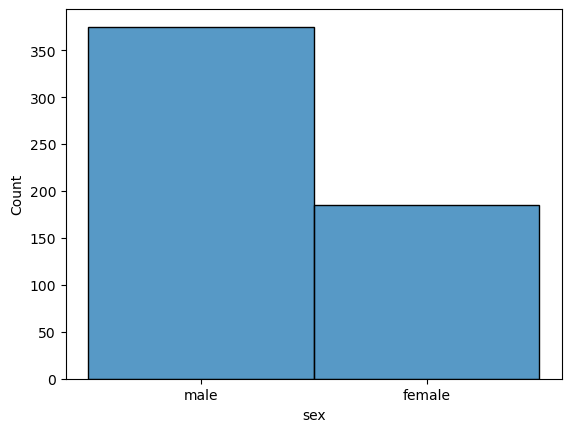

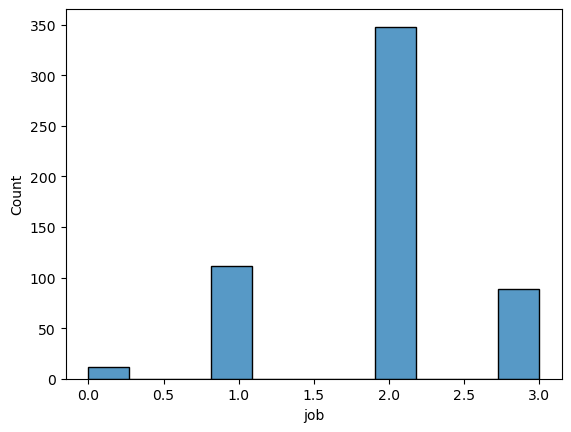

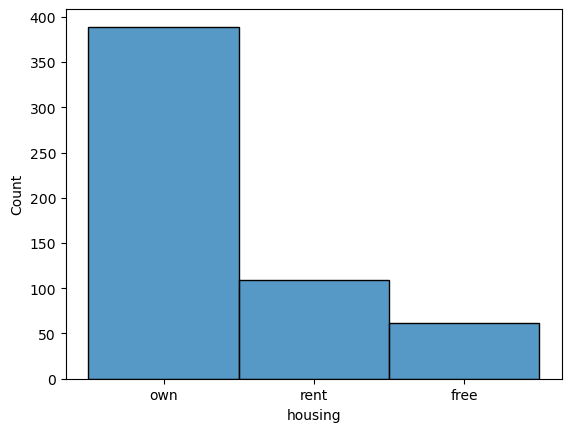

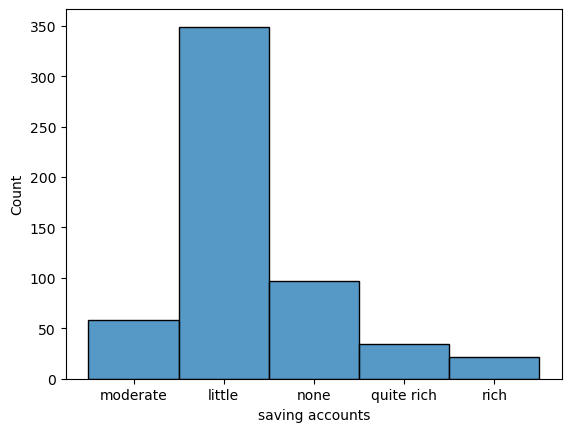

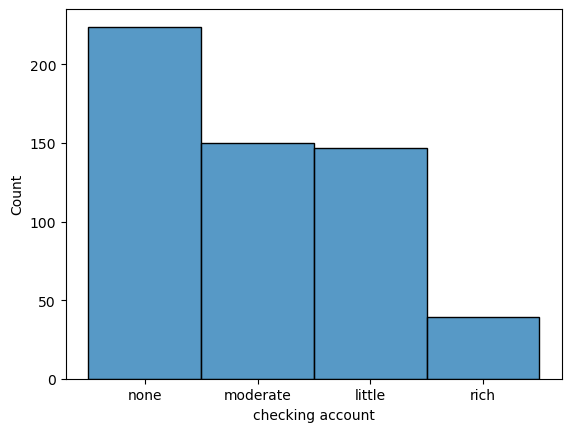

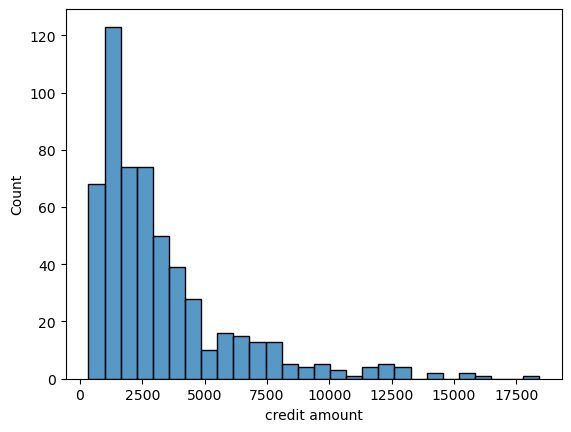

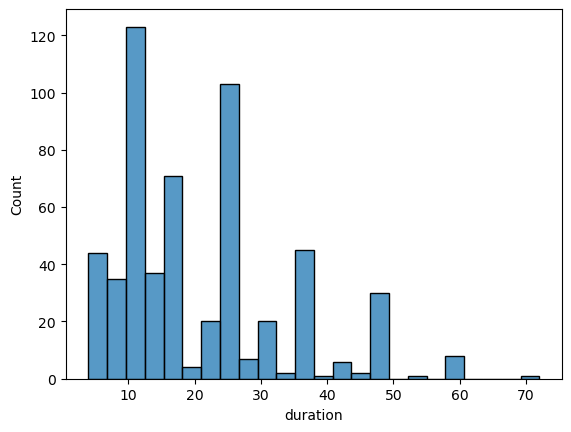

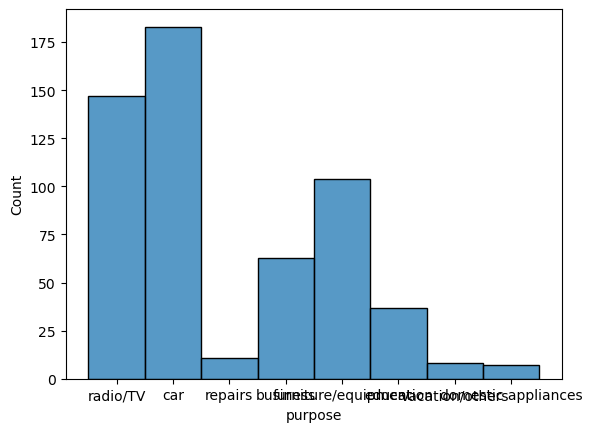

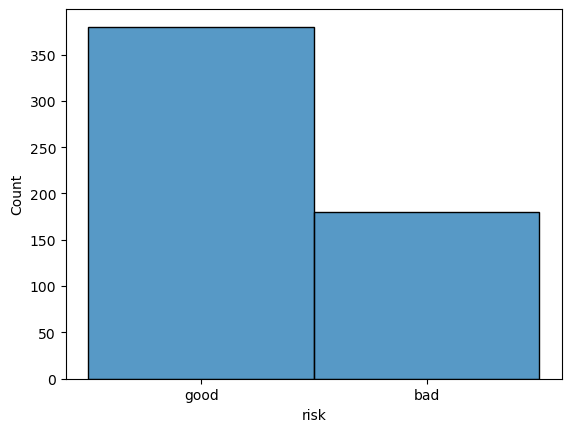

In [13]:
for col in train.columns:
    #n = 441
    sns.histplot(data = train, x = col)
    #plt.subplot(n)
    #n +=1
    plt.show()

In [76]:
import plotly.express as px

In [81]:
train.columns.to_list()

['age',
 'sex',
 'job',
 'housing',
 'saving accounts',
 'checking account',
 'credit amount',
 'duration',
 'purpose',
 'risk']

In [4]:
train['saving accounts'].unique().to_list()

[nan, 'little', 'quite rich', 'moderate', 'rich']

In [85]:
data = train
fig = px.sunburst(data_frame = train,
            path= ['age', 'saving accounts', 'credit amount'],
            values = 'risk')
            
fig.show()


ValueError: Column `risk` of `df` could not be converted to a numerical data type.

In [ ]:
'''
plotly.express.sunburst(data_frame=None, 
                        names=None, 
                        values=None, 
                        parents=None, 
                        title=None,)
fig = px.sunburst(df, names='country', values='pop', parents='continent', title='Population')
'''